# 회귀로 몸무게 예측하기
* 주어진 데이터를 바탕으로 펭귄 몸무게 예측하기

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')


%matplotlib inline

# 데이터 불러오기

In [3]:
# csv 형식으로 된 데이터 파일을 읽어옵니다.
df_train= pd.read_csv('dataset/train.csv')
df_test= pd.read_csv('dataset/test.csv')

# 데이터의 최상단 5 줄을 표시합니다.
df_train.head(5)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [4]:
df_train.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


count row에서 몇몇 feature가 손실된 것을 확인할 수 있습니다.

# 결츨지 확인

In [5]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_num = sum(dataframe[col].isna())
        is_missing = True if missing_num >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_num}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
            # print(missing_col)
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

In [6]:
missing_col = check_missing_col(df_train)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.


In [7]:
for col in df_train.columns:
    msg = 'column: {:>20}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column:                   id	 Percent of NaN value: 0.00%
column:              Species	 Percent of NaN value: 0.00%
column:               Island	 Percent of NaN value: 0.00%
column:    Clutch Completion	 Percent of NaN value: 0.00%
column:   Culmen Length (mm)	 Percent of NaN value: 0.00%
column:    Culmen Depth (mm)	 Percent of NaN value: 0.00%
column:  Flipper Length (mm)	 Percent of NaN value: 0.00%
column:                  Sex	 Percent of NaN value: 2.63%
column:    Delta 15 N (o/oo)	 Percent of NaN value: 2.63%
column:    Delta 13 C (o/oo)	 Percent of NaN value: 2.63%
column:        Body Mass (g)	 Percent of NaN value: 0.00%


Sex, Delta 15 N (o/oo), Delta 13 C (o/oo) 에서 값이 비어있는 것을 확인할 수 있습니다.

In [8]:
missing_col = check_missing_col(df_test)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 6개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 9개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 8개의 결측치가 존재합니다.


In [9]:
for col in df_test.columns:
    msg = 'column: {:>20}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column:                   id	 Percent of NaN value: 0.00%
column:              Species	 Percent of NaN value: 0.00%
column:               Island	 Percent of NaN value: 0.00%
column:    Clutch Completion	 Percent of NaN value: 0.00%
column:   Culmen Length (mm)	 Percent of NaN value: 0.00%
column:    Culmen Depth (mm)	 Percent of NaN value: 0.00%
column:  Flipper Length (mm)	 Percent of NaN value: 0.00%
column:                  Sex	 Percent of NaN value: 2.63%
column:    Delta 15 N (o/oo)	 Percent of NaN value: 3.95%
column:    Delta 13 C (o/oo)	 Percent of NaN value: 3.51%


test set에서도 동일하게 확인을 해준 후, 이후에 train set과 동일하게 비어있는 데이터를 채워줘야 합니다.

## 다양한 feature와 Body Mass의 관계를 불러옵니다.

In [10]:
df_train[['Species', 'Body Mass (g)']].groupby(['Species'], as_index=True).mean()

,Body Mass (g)
Species,
Adelie Penguin (Pygoscelis adeliae),3801.219512
Chinstrap penguin (Pygoscelis antarctica),3756.000000
Gentoo penguin (Pygoscelis papua),5075.520833


In [11]:
df_train[['Island', 'Body Mass (g)']].groupby(['Island'], as_index=True).mean()

,Body Mass (g)
Island,
Biscoe,4878.947368
Dream,3764.772727
Torgersen,3817.307692


In [12]:
df_train[['Clutch Completion', 'Body Mass (g)']].groupby(['Clutch Completion'], as_index=True).mean()

,Body Mass (g)
Clutch Completion,
No,4116.666667
Yes,4352.696078


In [13]:
df_train[['Culmen Length (mm)', 'Body Mass (g)']].groupby(['Culmen Length (mm)'], as_index=True).mean()

,Body Mass (g)
Culmen Length (mm),
33.5,3600.0
34.0,3400.0
34.1,3475.0
35.3,3800.0
35.5,3350.0
...,...
52.8,4550.0
53.4,5500.0
53.5,4500.0


In [14]:
df_train[['Culmen Depth (mm)', 'Body Mass (g)']].groupby(['Culmen Depth (mm)'], as_index=True).mean()

,Body Mass (g)
Culmen Depth (mm),
13.2,4500.000000
13.3,5100.000000
13.5,4150.000000
13.9,4900.000000
14.0,4575.000000
14.1,4412.500000
14.2,4750.000000
14.4,4525.000000
14.5,4700.000000


In [15]:
df_train[['Sex', 'Body Mass (g)']].groupby(['Sex'], as_index=False).mean().sort_values(by='Body Mass (g)', ascending=False)

,Sex,Body Mass (g)
1,MALE,4659.821429
0,FEMALE,4000.909091


In [16]:
df_train[['Delta 15 N (o/oo)', 'Body Mass (g)']].groupby(['Delta 15 N (o/oo)'], as_index=False).mean().sort_values(by='Body Mass (g)', ascending=False)

,Delta 15 N (o/oo),Body Mass (g)
28,8.27376,6300.0
39,8.40327,6000.0
9,8.08354,5850.0
53,8.59640,5800.0
38,8.38324,5700.0
...,...,...
64,8.88098,3275.0
106,9.68950,3250.0
80,9.21510,3075.0
90,9.36392,3000.0


In [17]:
df_train[['Delta 13 C (o/oo)', 'Body Mass (g)']].groupby(['Delta 13 C (o/oo)'], as_index=False).mean().sort_values(by='Body Mass (g)', ascending=False)

,Delta 13 C (o/oo),Body Mass (g)
83,-25.00169,6300.0
11,-26.76821,6000.0
42,-26.18161,5850.0
15,-26.71199,5800.0
5,-26.84272,5700.0
...,...,...
57,-25.89741,3275.0
100,-24.43062,3250.0
39,-26.22530,3075.0
81,-25.01745,3000.0


# 데이터 전처리
- 범주형 데이터가 숫자형 데이터 변현하기

In [18]:
# MALE -> 1
df_train['Sex'].replace(['MALE','FEMALE'],[1,0],inplace=True)
df_test['Sex'].replace(['MALE','FEMALE'],[1,0],inplace=True)
# YES -> 1
df_train['Clutch Completion'].replace(['No','Yes'],[0,1],inplace=True)
df_test['Clutch Completion'].replace(['No','Yes'],[0,1],inplace=True)
# Biscoe -> 0, and so on
df_train['Island'].replace(['Biscoe','Dream', 'Torgersen'],[0,1,2],inplace=True)
df_test['Island'].replace(['Biscoe','Dream', 'Torgersen'],[0,1,2],inplace=True)
# Gentoo penguin (Pygoscelis papua) -> 0 and so on
df_train['Species'].replace(['Gentoo penguin (Pygoscelis papua)','Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'],[0,1,2],inplace=True)
df_test['Species'].replace(['Gentoo penguin (Pygoscelis papua)','Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'],[0,1,2],inplace=True)


값이 잘 바뀌었는지 한 번 확인해줍니다.

In [19]:
df_train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,0,0,1,50.0,15.3,220,1.0,8.30515,-25.19017,5550
1,1,1,1,0,49.5,19.0,200,1.0,9.63074,-24.34684,3800
2,2,0,0,1,45.1,14.4,210,0.0,8.51951,-27.01854,4400
3,3,0,0,1,44.5,14.7,214,0.0,8.20106,-26.16524,4850
4,4,0,0,0,49.6,16.0,225,1.0,8.38324,-26.84272,5700


# heatmap을 활용하여 시각화

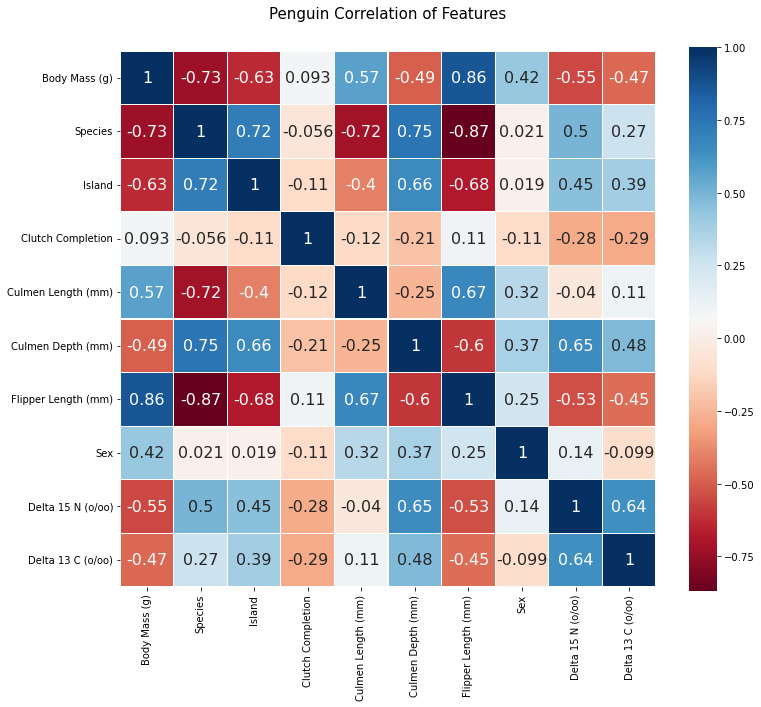

In [20]:
heatmap_data = df_train[['Body Mass (g)','Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)','Delta 13 C (o/oo)']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(12, 10))
plt.title('Penguin Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

## 결측치 처리

In [21]:
df_train['Sex'].mean()

0.5045045045045045

성별이 반반 정도 인것을 확인하고, 성별과 가장 상관관계가 뚜렷한 Body Mass에 따라서 성별을 임의로 부여합니다

In [22]:
# from the groupby just now
Male_Female_line = (4659.821429 + 4000.909091) / 2
Male_Female_line

4330.36526

In [23]:
df_train.loc[(df_train.Sex.isnull())&(df_train['Body Mass (g)'] > Male_Female_line),'Sex'] = 1
df_train.loc[(df_train.Sex.isnull())&(df_train['Body Mass (g)'] <= Male_Female_line),'Sex'] = 0

In [24]:
missing_col = check_missing_col(df_train)

결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.


Test set에는 Body Mass에 대한 데이터가 없기 때문에 Flipper Length의 값에 따라서 비어있는 데이터를 채워줍니다.

In [25]:
df_train[['Sex', 'Flipper Length (mm)']].groupby(['Sex'], as_index=False).mean().sort_values(by='Flipper Length (mm)', ascending=False)


,Sex,Flipper Length (mm)
1,1.0,206.929825
0,0.0,199.175439


In [26]:
flipper_length_mean = df_train['Flipper Length (mm)'].mean()
print('flipper_length_mean is ', flipper_length_mean)

flipper_length_mean is  203.05263157894737


In [27]:
df_test.loc[(df_test.Sex.isnull())&(df_test['Flipper Length (mm)'] > flipper_length_mean),'Sex'] = 1
df_test.loc[(df_test.Sex.isnull())&(df_test['Flipper Length (mm)'] <= flipper_length_mean),'Sex'] = 0

In [28]:
train_delta_15_mean = df_train['Delta 15 N (o/oo)'].mean()
print('train_delta_15_mean is ', train_delta_15_mean)
test_delta_15_mean = df_test['Delta 15 N (o/oo)'].mean()
print('test_delta_15_mean is ', test_delta_15_mean)
train_delta_13_mean = df_train['Delta 13 C (o/oo)'].mean()
print('train_delta_13_mean is ', train_delta_13_mean)
test_delta_13_mean = df_test['Delta 13 C (o/oo)'].mean()
print('test_delta_13_mean is ', test_delta_13_mean)

train_delta_15_mean is  8.73763414414414
test_delta_15_mean is  8.731226347031962
train_delta_13_mean is  -25.723051081081067
test_delta_13_mean is  -25.667744681818192


In [29]:
df_train.loc[(df_train['Delta 15 N (o/oo)'].isnull()),'Delta 15 N (o/oo)'] = train_delta_15_mean
df_test.loc[(df_test['Delta 15 N (o/oo)'].isnull()),'Delta 15 N (o/oo)'] = test_delta_15_mean

df_train.loc[(df_train['Delta 13 C (o/oo)'].isnull()),'Delta 13 C (o/oo)'] = train_delta_13_mean
df_test.loc[(df_test['Delta 13 C (o/oo)'].isnull()),'Delta 13 C (o/oo)'] = test_delta_13_mean

In [30]:
missing_col = check_missing_col(df_train)

결측치가 존재하지 않습니다


In [31]:
missing_col = check_missing_col(df_test)

결측치가 존재하지 않습니다


In [32]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [33]:
X = df_train.drop('Body Mass (g)', axis=1) # label을 제외한 나머지 컬럼들을 X에 저장합니다.
Y = df_train['Body Mass (g)'] # label인 Body mess를 Y에 저장합니다.
Y

0      5550
1      3800
2      4400
3      4850
4      5700
       ... 
109    3700
110    4250
111    4100
112    2700
113    5600
Name: Body Mass (g), Length: 114, dtype: int64

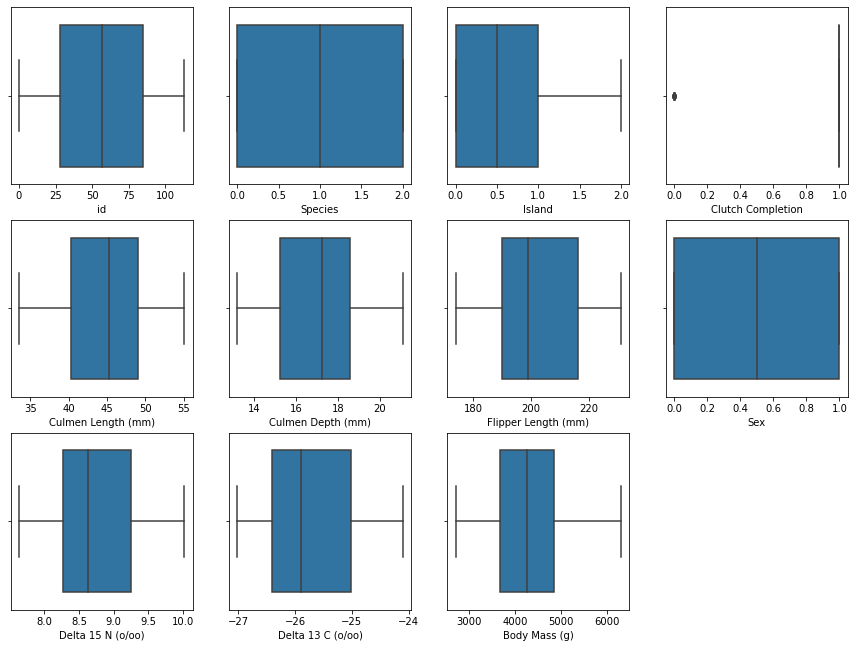

In [34]:
plt.figure(figsize=(15, 15))

for idx, col in enumerate(list(df_train)):
    plt.subplot(4, 4, idx+1)
    sns.boxplot(df_train[col])

In [35]:
X

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,0,0,1,50.0,15.3,220,1.0,8.305150,-25.190170
1,1,1,1,0,49.5,19.0,200,1.0,9.630740,-24.346840
2,2,0,0,1,45.1,14.4,210,0.0,8.519510,-27.018540
3,3,0,0,1,44.5,14.7,214,0.0,8.201060,-26.165240
4,4,0,0,0,49.6,16.0,225,1.0,8.383240,-26.842720
...,...,...,...,...,...,...,...,...,...,...
109,109,2,2,1,36.6,17.8,185,0.0,8.737634,-25.723051
110,110,2,1,1,39.2,18.6,190,1.0,9.110060,-25.795490
111,111,2,1,1,43.2,18.5,192,1.0,8.970250,-26.036790
112,112,1,1,0,46.9,16.6,192,0.0,9.805890,-24.737350


In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

모델의 선택은 시행착오라고 배웠습니다. 따라서 여러 개의 모델들의 성능을 출력해보고 그 중 탑3를 가져와 앙상블을 진행해보겠습니다.

In [38]:
score_List=[]

In [39]:
model = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
score_List.append(f'KNeighborsRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = LinearRegression().fit(x_train, y_train)
score_List.append(f'LinearRegression: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = Ridge().fit(x_train, y_train)
score_List.append(f'Ridge: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = Lasso().fit(x_train, y_train)
score_List.append(f'Lasso: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = DecisionTreeRegressor().fit(x_train, y_train)
score_List.append(f'DecisionTreeRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = RandomForestRegressor().fit(x_train, y_train)
score_List.append(f'RandomForestRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = GradientBoostingRegressor().fit(x_train, y_train)
score_List.append(f'GradientBoostingRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = XGBRegressor().fit(x_train, y_train)
score_List.append(f'XGBRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = LGBMRegressor().fit(x_train, y_train)
score_List.append(f'LGBMRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

In [40]:
[print(i) for i in score_List]

KNeighborsRegressor: train_score: 0.7494979344056367, val_score: 0.7689475024871797
LinearRegression: train_score: 0.8255644793725015, val_score: 0.8569858872707796
Ridge: train_score: 0.8250698052276767, val_score: 0.8563581703934702
Lasso: train_score: 0.8254924603776681, val_score: 0.8579843403465496
DecisionTreeRegressor: train_score: 1.0, val_score: 0.6096065209764163
RandomForestRegressor: train_score: 0.9691811316053419, val_score: 0.827680226081022
GradientBoostingRegressor: train_score: 0.992059136181487, val_score: 0.8385088485387544
XGBRegressor: train_score: 0.9999999998067068, val_score: 0.8086962696729394
LGBMRegressor: train_score: 0.9138242802141816, val_score: 0.8537804530701084


[None, None, None, None, None, None, None, None, None]

train_score가 아닌 val_score를 봐주셔야합니다.

LinearRegression, Ridge, Lasso, LGBMRegressor 등이 성능이 좋게 나온 것을 확인할 수 있었습니다.

In [41]:
model_LR = LinearRegression().fit(X, Y)
model_RID = Ridge().fit(X, Y)
model_LA = Lasso().fit(X, Y)
model_LGBM = LGBMRegressor().fit(X, Y)
model_XGB = XGBRegressor().fit(X, Y)

random_state가 없기 때문에 순위는 항상 바뀝니다.
저는 LinearRegression, Ridge, Lasso, XGBRegressor, LGBMRegressor 모델을 택했습니다.

In [42]:
df_test

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,1,1,1,52.0,20.7,210,1.0,9.43146,-24.68440
1,1,0,0,1,55.9,17.0,228,1.0,8.31180,-26.35425
2,2,2,1,1,38.9,18.8,190,0.0,8.36936,-26.11199
3,3,1,1,1,45.2,16.6,191,0.0,9.62357,-24.78984
4,4,2,0,0,37.9,18.6,172,0.0,8.38404,-25.19837
...,...,...,...,...,...,...,...,...,...,...
223,223,1,1,1,49.3,19.9,203,1.0,9.88809,-24.59513
224,224,0,0,1,46.5,14.8,217,0.0,8.58487,-26.59290
225,225,0,0,1,46.5,13.5,210,0.0,7.99530,-25.32829
226,226,1,1,1,50.5,19.6,201,1.0,9.80590,-24.72940


앙상블 진행, 사실 저도 머신러닝 초보이기때문에 이 개념이 앙상블이 맞는지는 모르겠습니다. 하지만 단언컨데 성능향상은 확실했습니다.

In [43]:
pred_LR = model_LR.predict(df_test)
pred_RID = model_RID.predict(df_test)
pred_LA = model_LA.predict(df_test)
pred_LGBM = model_LGBM.predict(df_test)
pred_XGB = model_XGB.predict(df_test)
pred = pred_LR*0.2 + pred_RID*0.2 + pred_LA*0.2 + pred_LGBM*0.2 + pred_XGB*0.2
pred

array([4319.78067532, 5458.35281268, 3583.48380542, 3428.77969106,
       3375.39878267, 4241.02601852, 4594.85234795, 5043.58188142,
       4654.77848052, 4023.4032845 , 4253.46831129, 4499.87330519,
       4751.90766137, 4677.45745578, 4942.63224237, 5133.93411426,
       4056.69717352, 4025.34025368, 3436.78557279, 3587.58980504,
       4217.26921827, 5495.83222988, 5371.80487268, 4031.70937898,
       3606.68128705, 4579.44846374, 3440.1210623 , 3952.92419212,
       4110.13603279, 4672.56946907, 3587.99956992, 4749.22521191,
       3700.15488143, 4952.81860556, 3989.4537569 , 3102.69586932,
       4435.80485751, 3731.47344618, 4075.81006139, 4598.3683711 ,
       3972.84106075, 3731.21780297, 3947.87021431, 5459.46689446,
       3687.05547157, 4641.18224768, 3402.77946311, 4311.65793955,
       4739.88177814, 5538.6425292 , 3888.99359557, 4202.94722182,
       3336.75733325, 4329.41037939, 4186.30682816, 4037.58560095,
       4666.84516204, 4212.6167485 , 4745.39364183, 3852.66414

# RMSE

In [44]:
# 대회 규칙의 평가 산식 함수를 그대로 사용합니다.
import numpy as np

def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

# dacon 대회에 제출하기

이제 이 예측 결과를 submission.csv 파일로 만들어서 대회 페이지에 제출해보도록 합시다.

제출한 뒤 리더보드를 통해 결과를 확인합시다.

In [45]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('dataset/sample_submission.csv')
submission.head()

,id,Body Mass (g)
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [46]:
print(submission.shape)
print(pred.shape)

(228, 2)
(228,)


In [47]:
# 위에서 구한 예측값을 그대로 넣어줍니다.
submission['Body Mass (g)'] = pred

# 데이터가 잘 들어갔는지 확인합니다.
submission

,id,Body Mass (g)
0,0,4319.780675
1,1,5458.352813
2,2,3583.483805
3,3,3428.779691
4,4,3375.398783
...,...,...
223,223,4089.744464
224,224,4724.639962
225,225,4514.592782
226,226,3957.731370


In [48]:
submission.to_csv("./result/submission_20220107_v4.csv", index=False)